In [424]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [426]:
df = pd.read_csv("Sales Data.csv")
df

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [417]:
df = df.drop('Unnamed: 0', axis=1)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


# EDA : Exploratory Data Analysis

### Column Descriptions: 

Order ID: A unique identifier for each order placed. Each order can have multiple items but is identified by the same ID.              
Insight: Order ID is useful for understanding order patterns but not directly relevant to time series analysis.     

Product: The name of the product that was purchased (e.g., "Macbook Pro Laptop").                          
Insight: Analyzing product trends over time can help in identifying popular items in certain months or seasons.      

Quantity Ordered: The number of units of the product purchased in that particular order.                                
Insight: Time series analysis on the quantity ordered can show demand trends over time for inventory management.

Price Each: The price of a single unit of the product.                                                                                
Insight: This can indicate how pricing strategies change over time, such as discounts during certain seasons or economic conditions.

Order Date: The exact date and time when the order was placed, with both date and hour information (e.g., "2019-12-30 00:01:00").                
Insight: Order Date is essential for time series analysis. You can use this column to:       
Identify sales trends by day, week, month, or hour.        
Analyze seasonal patterns and periodicity in the data.    
Apply time series forecasting models (e.g., ARIMA, LSTM).           

Purchase Address: The full address where the order was shipped (e.g., "136 Church St, New York City, NY 10001").                   
Insight: Although this is more of a location-based feature, analyzing addresses in time series can reveal geographical trends, like which cities or states have higher order frequencies at different times of the year.

Month: The month in which the order was placed (e.g., 12 for December).                          
Insight: This is derived from the Order Date and is useful for summarizing trends by month. It simplifies monthly analysis to identify peak seasons for sales (e.g., December holiday season).

Sales: The total sales amount for the order (Quantity Ordered * Price Each).                    
Insight: This is the target variable for time series analysis. By tracking sales over time, you can identify:          
Trends: Are sales increasing or decreasing over time?                        
Seasonality: Do certain months or periods of the year see spikes in sales? For example, December might see more sales due to holiday shopping.     
Anomalies: Any unusual sales spikes or dips can be identified and investigated.                   
Forecasting: Models can predict future sales based on historical trends.                       

City: The city where the order was placed (e.g., "New York City").                                 
Insight: This is useful for geographic segmentation and comparison of time series data across different cities. Some cities may have different shopping behaviors or demand patterns.

Hour: The hour of the day when the order was placed (e.g., 0 for midnight, 7 for early morning).                          
Insight: This allows for analysis of time-of-day trends. For instance, you might find that most sales occur in the evening or during specific hours on weekends.

### 1. Data Overview
First, you can load and inspect the dataset to get a basic understanding of its structure.

In [331]:
# Check the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Check data types
# Check data types
print(df.dtypes)

   Order ID               Product  Quantity Ordered  Price Each  \
0    295665    Macbook Pro Laptop                 1     1700.00   
1    295666    LG Washing Machine                 1      600.00   
2    295667  USB-C Charging Cable                 1       11.95   
3    295668      27in FHD Monitor                 1      149.99   
4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     Sales            City  Hour  
0  1700.00   New York City     0  
1   600.00   New York City     7  
2    11.95   New York City    18  
3   149.99   San F

### 2. Distribution of Sales Across Time
To analyze sales trends over time, we can create visualizations showing how sales vary by month, day, and hour.

Monthly Sales Trend: This will show if there’s any seasonality in sales.

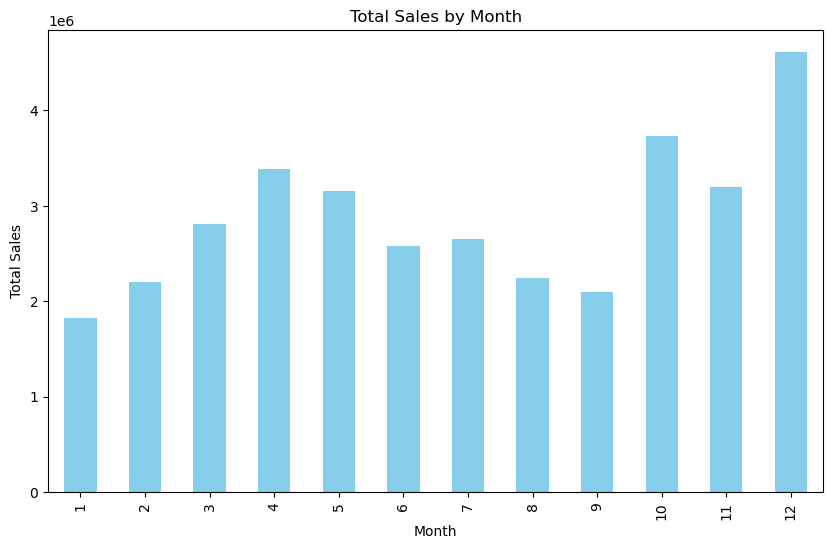

In [334]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by Month and sum the Sales
monthly_sales = df.groupby('Month')['Sales'].sum()

# Plot the Monthly Sales
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

Daily and Hourly Sales Trends: These plots will show which days and hours are more popular for purchases.

In [337]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract day and hour from the 'Order Date'
df['Order Day'] = df['Order Date'].dt.day
df['Order Hour'] = df['Order Date'].dt.hour

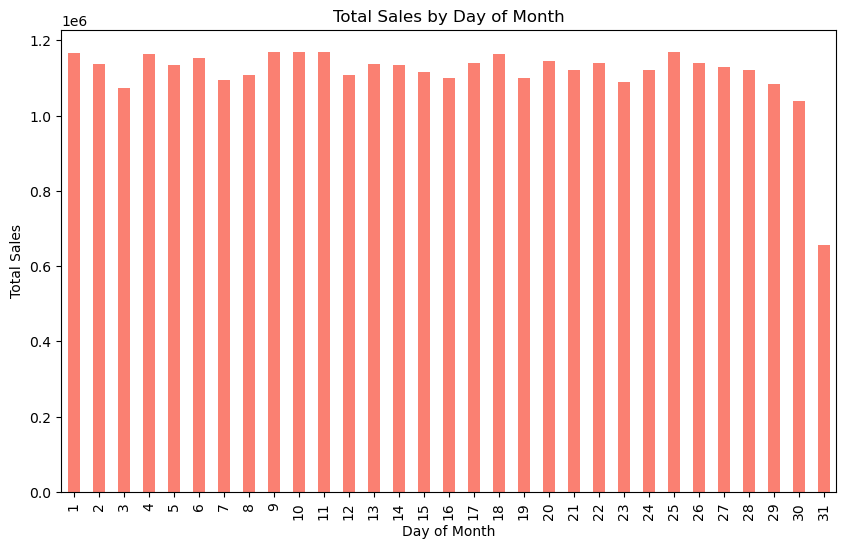

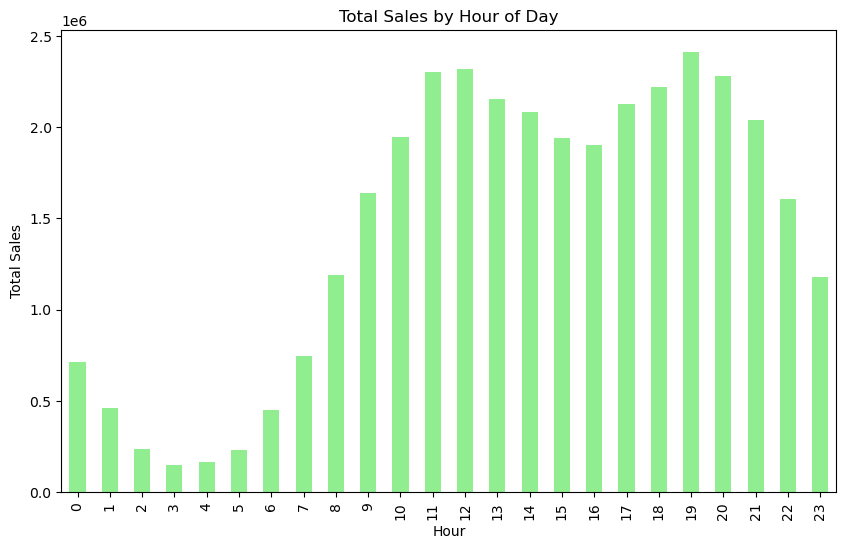

In [339]:
# Group by day and hour
daily_sales = df.groupby('Order Day')['Sales'].sum()
hourly_sales = df.groupby('Order Hour')['Sales'].sum()

# Plot Daily Sales
plt.figure(figsize=(10,6))
daily_sales.plot(kind='bar', color='salmon')
plt.title('Total Sales by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Total Sales')
plt.show()

# Plot Hourly Sales
plt.figure(figsize=(10,6))
hourly_sales.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.show()

### 3. City-Wise Sales Analysis
We can compare the sales performance across different cities to identify geographical trends.

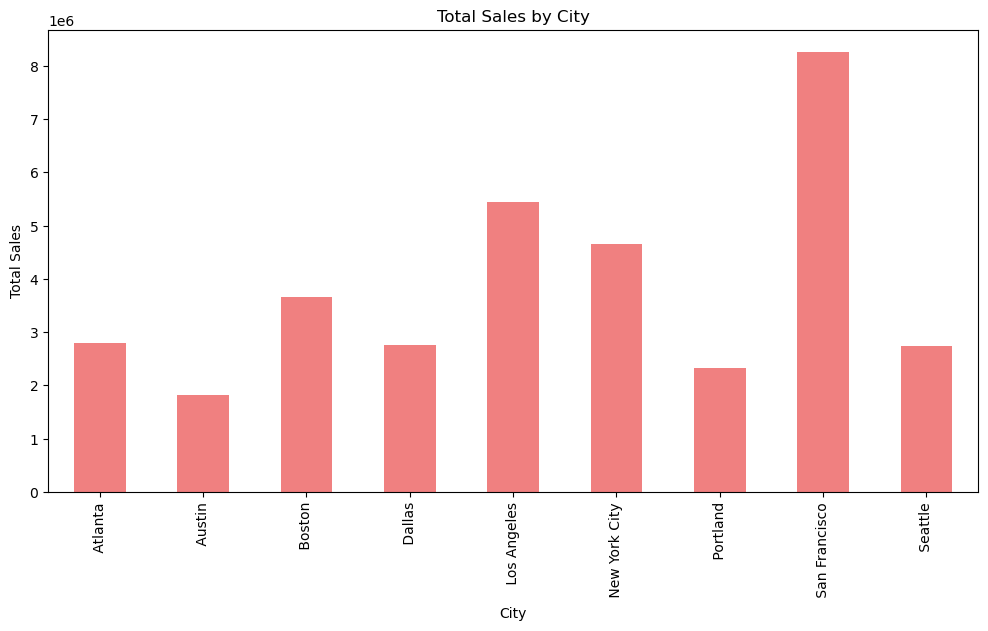

In [341]:
# Group by City and sum the Sales
city_sales = df.groupby('City')['Sales'].sum()

# Plot the sales by city
plt.figure(figsize=(12,6))
city_sales.plot(kind='bar', color='lightcoral')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()

### 4. Product-Wise Sales Analysis
Here, we will analyze the sales of each product to identify the most popular ones.

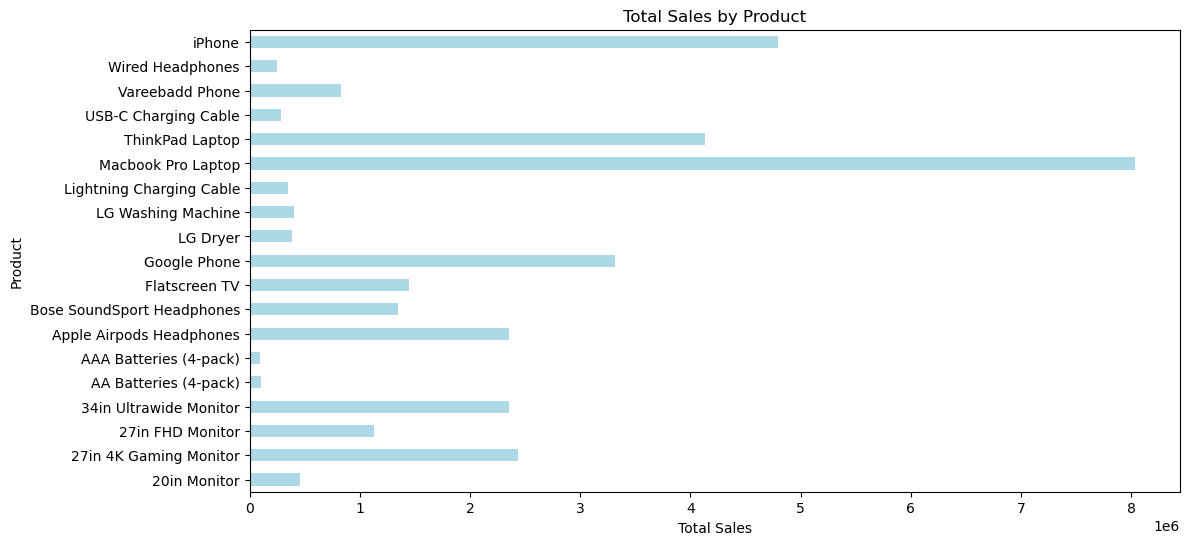

In [345]:
# Group by Product and sum the Sales
product_sales = df.groupby('Product')['Sales'].sum()

# Plot the sales by product
plt.figure(figsize=(12,6))
product_sales.plot(kind='barh', color='lightblue')
plt.title('Total Sales by Product')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

### 5. Quantity Ordered Over Time
You can also analyze the quantity of products ordered over time to get insights into demand trends.

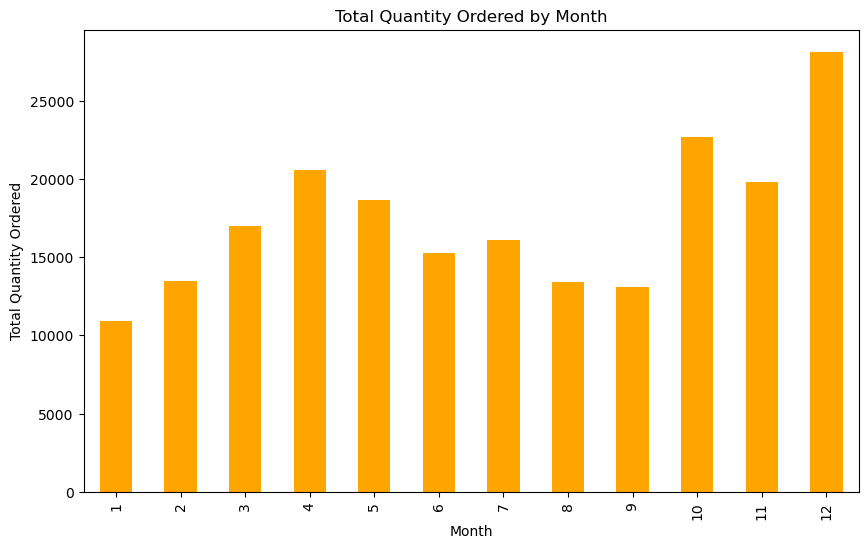

In [348]:
# Group by Month and sum the Quantity Ordered
monthly_quantity = df.groupby('Month')['Quantity Ordered'].sum()

# Plot the Monthly Quantity Ordered
plt.figure(figsize=(10,6))
monthly_quantity.plot(kind='bar', color='orange')
plt.title('Total Quantity Ordered by Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity Ordered')
plt.show()

### 6. Sales by Time of Day
We can see the distribution of sales by hour, which will reveal what time of day is most active.

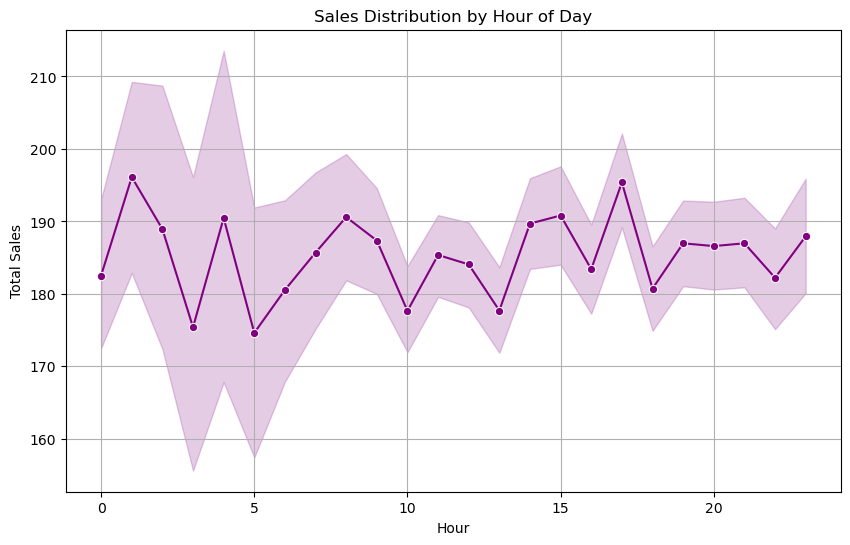

In [351]:
# Plot the hourly sales
plt.figure(figsize=(10,6))
sns.lineplot(x='Order Hour', y='Sales', data=df, marker='o', color='purple')
plt.title('Sales Distribution by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

### 7. Sales vs Price and Quantity
A scatter plot can show if there’s any relationship between Price Each, Quantity Ordered, and Sales.

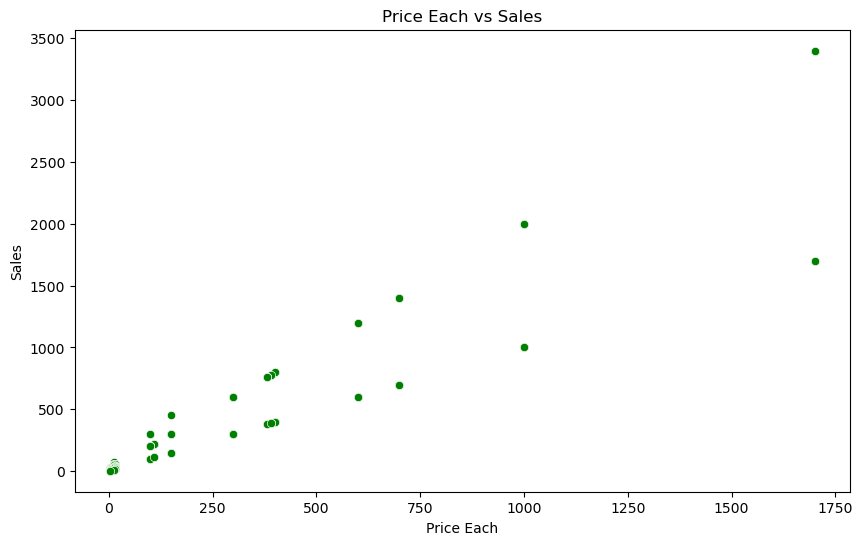

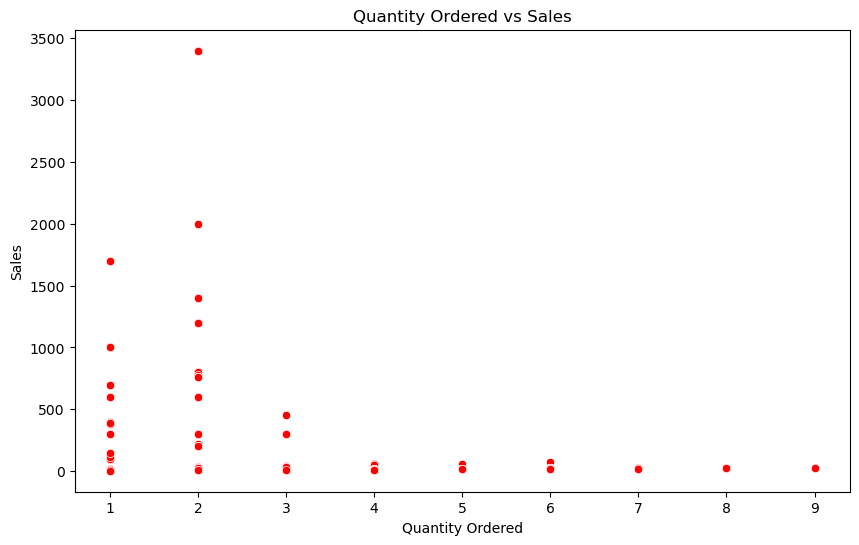

In [355]:
# Scatter plot of Price Each vs Sales
plt.figure(figsize=(10,6))
sns.scatterplot(x='Price Each', y='Sales', data=df, color='green')
plt.title('Price Each vs Sales')
plt.xlabel('Price Each')
plt.ylabel('Sales')
plt.show()

# Scatter plot of Quantity Ordered vs Sales
plt.figure(figsize=(10,6))
sns.scatterplot(x='Quantity Ordered', y='Sales', data=df, color='red')
plt.title('Quantity Ordered vs Sales')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.show()

### 8. Correlation Analysis
Finally, we can analyze correlations between numerical variables like Quantity Ordered, Price Each, and Sales to see if there are strong relationships.

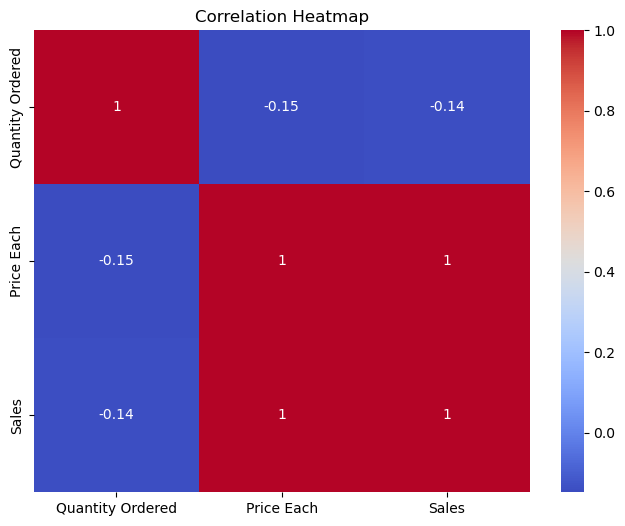

In [357]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Quantity Ordered', 'Price Each', 'Sales']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [428]:
import io

# Read the file content as a binary stream
with open('SCMS_Delivery_History_Dataset_20150929.csv', 'rb') as f:
    content = f.read()

# Decode the content using the detected encoding while replacing errors
decoded_content = content.decode('ISO-8859-1', errors='replace')

# Convert the decoded content into a StringIO object
content_io = io.StringIO(decoded_content)

# Use pd.read_csv() to read the content from the StringIO object
df = pd.read_csv(content_io)

# Display the first few rows of the dataframe
print(df.head())

   ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  ...  \
0   PMO - US  Direct Drop              EXW           Air  ...   
1   PMO - US  Direct Drop              EXW           Air  ...   
2   PMO - US  Direct Drop              FCA           Air  ...   
3   PMO - US  Direct Drop              EXW           Air  ...   
4   PMO - US  Direct Drop              EXW           Air  ...   

  Unit of Measure (Per Pack) Line Item Quantity Line Item Value Pack Price  \
0                         30                 19           551.0      29.00   
1                   

In [430]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [361]:
# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

# Display basic information about the dataframe
print("\nBasic information about the dataframe:")
print(df.info())

# Check for missing values
print("\nMissing values in the dataframe:")
print(df.isnull().sum())

# Display basic statistics of the dataframe
print("\nBasic statistics of the dataframe:")
print(df.describe(include='all'))

First few rows of the dataframe:
   ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  ...  \
0   PMO - US  Direct Drop              EXW           Air  ...   
1   PMO - US  Direct Drop              EXW           Air  ...   
2   PMO - US  Direct Drop              FCA           Air  ...   
3   PMO - US  Direct Drop              EXW           Air  ...   
4   PMO - US  Direct Drop              EXW           Air  ...   

  Unit of Measure (Per Pack) Line Item Quantity Line Item Value Pack Price  \
0                         30                 19           551.0  


Dataset Insights
The dataset consists of 10,324 entries and 33 columns related to various aspects of supply chain management, including order processing, shipment, product details, and costs. Here are some key insights:

1. Project and Order Details:

Project Code, PQ #, PO / SO #, ASN/DN #: These columns contain identifiers for projects and orders. 

Country: The country where the order is being processed or delivered. The dataset includes orders from various countries, with South Africa being the most frequent.


2. Shipment and Delivery:

Managed By, Fulfill Via, Vendor INCO Term, Shipment Mode: These columns describe how the orders are managed, fulfilled, and shipped. Most shipments are managed by PMO - US and shipped via air.

PQ First Sent to Client Date, PO Sent to Vendor Date, Scheduled Delivery Date, Delivered to Client Date, Delivery Recorded Date: These columns provide dates for various stages in the order processing and delivery timeline.

3. Product Details:

Product Group, Sub Classification, Vendor, Item Description, Molecule/Test Type, Brand, Dosage, Dosage Form: These columns provide detailed information about the products being ordered and shipped.

4. Pricing and Costs:

Unit of Measure (Per Pack), Line Item Quantity, Line Item Value, Pack Price, Unit Price: These columns provide pricing information at different levels of aggregation.

Freight Cost (USD), Line Item Insurance (USD): These columns provide additional cost details related to shipping and insurance.

5.Manufacturing and Designation:

Manufacturing Site, First Line Designation: Information about the manufacturing site and whether the item is a first-line designation.

6.Weights and Measures:

Weight (Kilograms): The weight of the shipments.

Freight Cost (USD), Line Item Insurance (USD): Costs associated with freight and insurance.

-Preparing for Time Series Analysis

To perform a time series analysis, we need to focus on columns that have temporal data. In this dataset, the relevant columns include various date columns and the 'Line Item Value', which can be used as the target variable for time series forecasting.

### Trend analysis

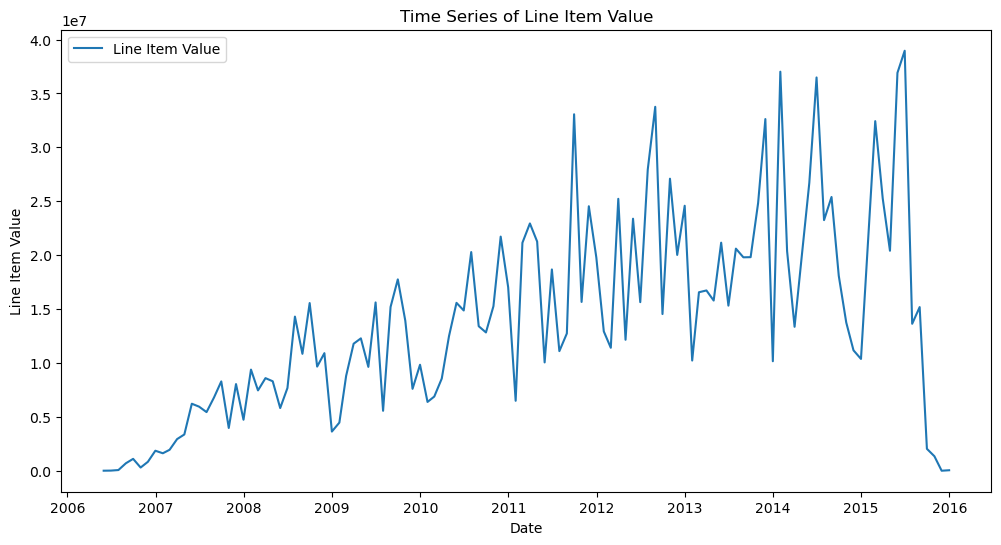

In [364]:
# Convert 'Scheduled Delivery Date' to datetime
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'])

# Set the 'Scheduled Delivery Date' as the index
df.set_index('Scheduled Delivery Date', inplace=True)

# Resample the data to monthly frequency and aggregate the 'Line Item Value'
monthly_data = df['Line Item Value'].resample('M').sum()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Line Item Value')
plt.title('Time Series of Line Item Value')
plt.xlabel('Date')
plt.ylabel('Line Item Value')
plt.legend()
plt.show()

Observation and Timestamp: Observations are the individual data points in the time series, and the timestamp is the time at which each observation is recorded. Here, Scheduled Delivery Date will be our timestamp and Line Item Value will be our observation.

Frequency: This refers to how often data points are collected. We need to determine the frequency of your data (e.g., daily, monthly, quarterly).

Trend: The overall direction in which the data is moving over a long period. We will use moving averages to identify trends.

Seasonality: Patterns that repeat at regular intervals (e.g., monthly, yearly). We will decompose the time series to identify seasonal components.

Cycle: Long-term oscillations that are not of a fixed period, often tied to economic or business cycles. These are harder to identify and will require a more detailed analysis.

Noise: Random variations that do not fit into the trend or seasonal patterns. This can be minimized through smoothing techniques.


### Decomposition :

The seasonal_decompose function from statsmodels is used to decompose the time series. The model parameter is set to 'additive' (use 'multiplicative' if the seasonal variations are proportional to the level of the series).

Additive Model

In an additive model, the components (trend, seasonality, and residual) are added together:

y(t)=Trend(t)+Seasonal(t)+Residual(t)

Multiplicative Model

In a multiplicative model, the components are multiplied together:

y(t)=Trend(t)×Seasonal(t)×Residual(t)

Trend: Represents the long-term increase or decrease in the series. Seasonal: Represents seasonal fluctuations that change proportionally with the level of the series. Residual: Represents random noise or irregularities.

Use a multiplicative model when seasonal variations are proportional to the level of the series. This means that as the level of the series increases or decreases, so do the seasonal fluctuations.

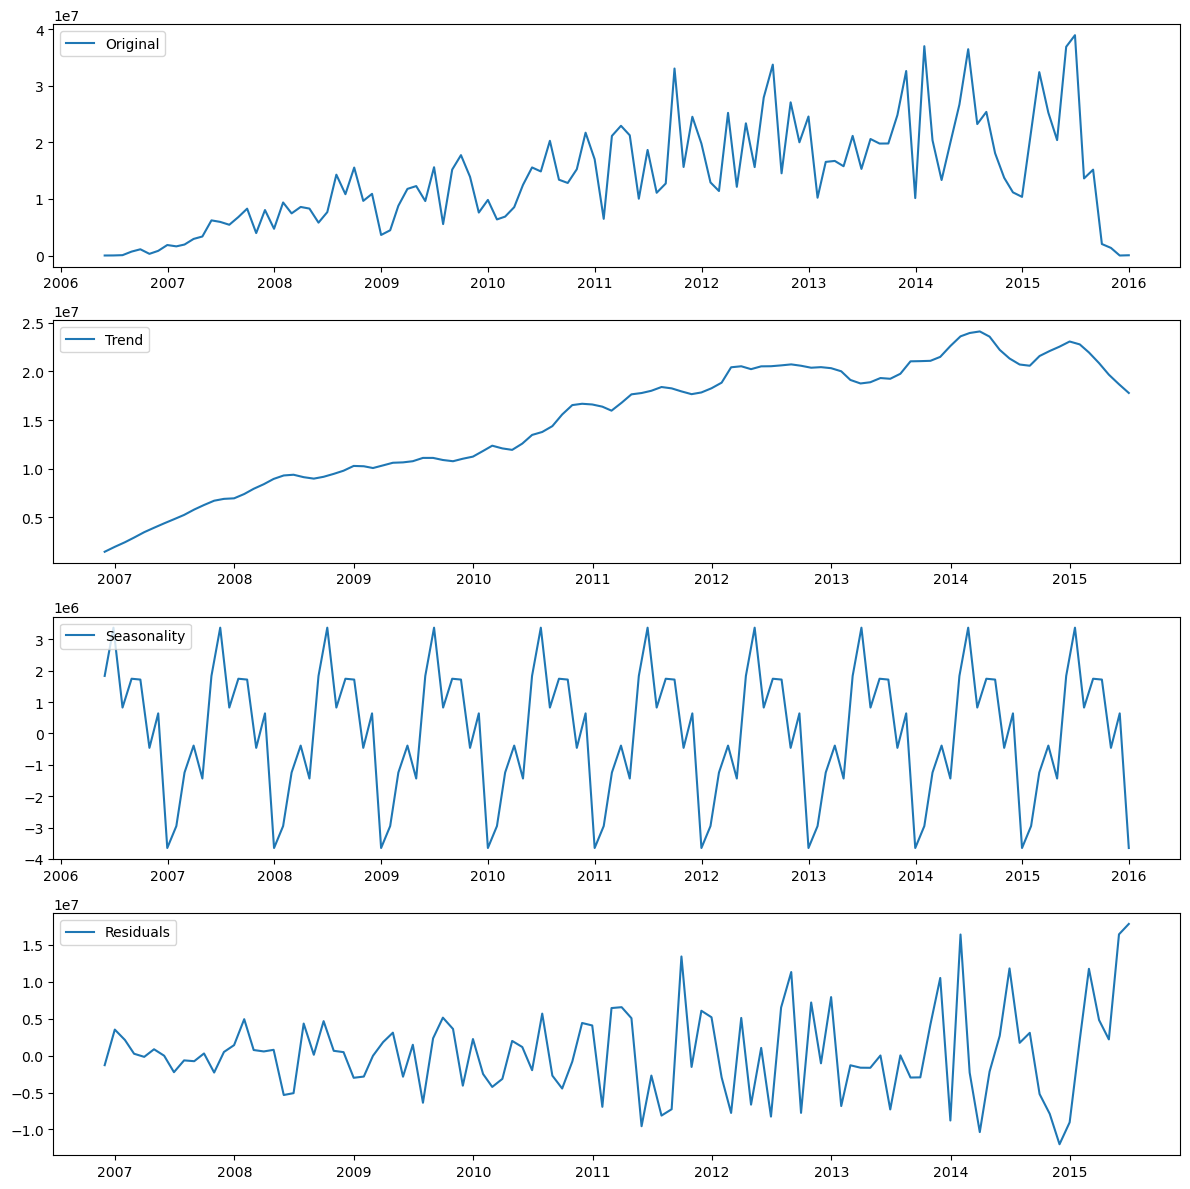

In [367]:
# Decompose the time series to identify trend, seasonality, and noise
decomposition = seasonal_decompose(monthly_data, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 12))
plt.subplot(411)
plt.plot(monthly_data, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Stationarity

What It Is: A stationary time series has constant mean, variance, and autocorrelation over time.In other words, stationarity in Time Series also means series without a Trend or Seasonal components.¶

Why It's Important: Many time series models assume stationarity. Non-stationary data can lead to unreliable and spurious results.

How to Check: Using the Augmented Dickey-Fuller (ADF) test (adfuller function), we can test for stationarity. A low p-value (typically < 0.05) indicates that the series is stationary.

Augmented Dickey-Fuller (ADF) Test

The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a given time series is stationary or not. Stationarity means that the statistical properties of the series such as mean and variance are constant over time. Non-stationary time series can often be made stationary through differencing or detrending.

Assumptions
Null Hypothesis ( 𝐻 0 H 0​): The time series has a unit root (i.e., it is non-stationary).
Alternative Hypothesis ( 𝐻 1 H 1​): The time series does not have a unit root (i.e., it is stationary).
Test Statistic: If the test statistic is less than the critical value, we reject the null hypothesis.
p-value: If the p-value is less than the significance level (e.g., 0.05), we reject the null hypothesis.

In [369]:
from statsmodels.tsa.stattools import adfuller

# Check for Stationarity
# Apply ADF test
result = adfuller(monthly_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -2.3694226674642604
p-value: 0.15055323572742896
Critical Values: {'1%': -3.4954932834550623, '5%': -2.8900369024285117, '10%': -2.5819706975209726}


KPSS Test

The Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test is used to test for stationarity. Unlike the ADF test, the KPSS test's null hypothesis is that the time series is stationary.

Assumptions
Null Hypothesis (H0): The time series has a unit root (it is non-stationary).
Alternative Hypothesis (H1): The time series does not have a unit root (it is stationary).
Test Statistic: If the test statistic is greater than the critical value, we reject the null hypothesis.
p-value: If the p-value is less than the significance level (e.g., 0.05), we reject the null hypothesis.

In [371]:
from statsmodels.tsa.stattools import kpss

# Apply KPSS test
result = kpss(monthly_data, regression='c')
print('KPSS Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[3])

KPSS Statistic: 1.3298010602185595
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


Differencing

What It Is: Differencing involves subtracting the current observation from the previous one to remove trends and seasonality, making the series stationary.

Why It's Useful: It helps in stabilizing the mean of a time series by removing changes in the level of a time series, thus eliminating (or reducing) trend and seasonality.

How to Apply: Using the diff method on the time series data. After differencing, we check stationarity again using the ADF test.



In [373]:
# Check for Stationarity
def check_stationarity(timeseries):
    result = adfuller(timeseries.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Values:')
        print(f'   {key}, {value}')

check_stationarity(monthly_data)

ADF Statistic: -2.3694226674642604
p-value: 0.15055323572742896
Critical Values:
   1%, -3.4954932834550623
Critical Values:
   5%, -2.8900369024285117
Critical Values:
   10%, -2.5819706975209726


ADF Statistic: -5.169555310497306
p-value: 1.0141577756881884e-05
Critical Values:
   1%, -3.4954932834550623
Critical Values:
   5%, -2.8900369024285117
Critical Values:
   10%, -2.5819706975209726


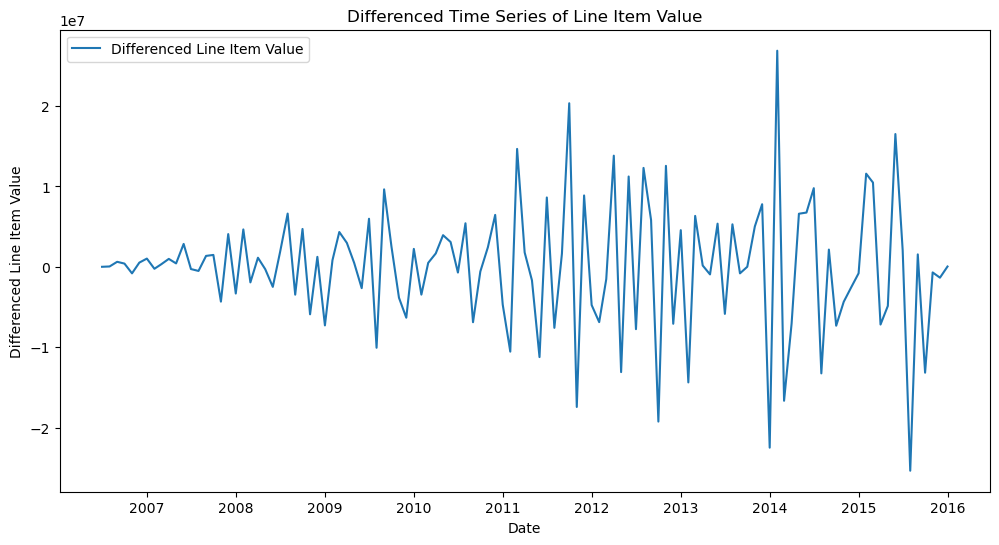

In [374]:
# Differencing to make the series stationary
monthly_data_diff = monthly_data.diff().dropna()

# Check stationarity of differenced data
check_stationarity(monthly_data_diff)

# Plot differenced data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data_diff, label='Differenced Line Item Value')
plt.title('Differenced Time Series of Line Item Value')
plt.xlabel('Date')
plt.ylabel('Differenced Line Item Value')
plt.legend()
plt.show()

### Detrending and Deseasonalizing

Deseasonalizing and Detrending time series data are techniques that can be used to remove certain components of the data that are not of interest when forecasting future values. This can help to improve the accuracy of the forecasts by reducing the influence of these extraneous components on the model.

#Deseasonalizi                                    ng
It can be difficult to analyze due to seasonal patterns and other fluctuations that can obscure underlying tren          ds,
That’s where deseasonalizing comes in, allowing you to isolate trends and make more accurate predictions.

Seasona                    lity :
In time series refers to a pattern that repeats itself at regular intervals ove                       r time.
This pattern could be daily, weekly, monthly, or even yearly, and it’s often caused by factors such as weather patterns, holidays, and other recurring events.

Let’s take the example of a company that sells                    ice cream.

The sales of ice cream may have a seasonal pattern, with higher sales during the summer and lower sales durwintering the This is because people tend to eat more ice cream in the summer when it’s hot outside, and less in the winter when it’s cold. This pattern of higher sales in the summer and lower sales in the winter is an example of seasonality in s.a time serie

Although the model doesn’t have information about the temperature, it can still capture the seasonal pattern in the data by looking atear. time of y

r.
It just knows that in July (northern hemisphere) and January (southern hemisphere) it must adjust its predictions upwards, and in December (northern hemisphere) and June (southern hemisphere) it must adjust itswa predictions downrds.

In some cases, analyzing the data without this seasonal effect can help you better unders tnd theeasonalizationomes in.

We can do this by using an additive model or a multiplicative model.

### ACF and PACF

ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) are both used in time series analysis to understand the relationships between observations at different lags. Here’s a comparison of the two:

Autocorrelation Function (ACF)

Definition: ACF measures the correlation between the time series and its lagged values. It shows the correlation between the time series values at different time lags.

Calculation: ACF is calculated for all lags and indicates how the time series is correlated with its past values over time. It considers the overall correlation without removing the influence of intermediate lags.

Use: ACF is used to identify the presence of seasonality, trends, and cyclic patterns in the data. It helps in identifying the lags that have significant correlation with the current values of the time series.

Plot: ACF plot shows the correlation coefficients on the y-axis and the lag values on the x-axis. Significant spikes in the ACF plot indicate strong correlation at those lags.

Partial Autocorrelation Function (PACF)

Definition: PACF measures the correlation between the time series and its lagged values, but with the effect of intermediate lags removed. It shows the direct relationship between the time series and its lags.

Calculation: PACF is calculated by removing the influence of the correlations at shorter lags. It isolates the correlation of the time series with a specific lag, excluding the effects of other lags.

Use: PACF is used to identify the order of the autoregressive (AR) terms in time series models. It helps in determining the number of lags that have a direct influence on the current values of the time series.

Plot: PACF plot shows the partial correlation coefficients on the y-axis and the lag values on the x-axis. Significant spikes in the PACF plot indicate the lags that have a direct impact on the time series.

Key Differences

ACF shows the total correlation of a time series with its past values, considering all intervening lags.
PACF shows the direct correlation of a time series with its past values, removing the effects of intermediate lags.

Example

Consider a time series dataset of monthly sales:

ACF Plot: If the ACF plot shows significant correlation at lags 1, 2, and 3, it suggests that the sales data at these lags are correlated with the current sales values.

PACF Plot: If the PACF plot shows significant correlation only at lag 1, it indicates that only the immediate previous month's sales directly influence the current month's sales, and the correlations at lags 2 and 3 are due to the indirect effect of the first lag.

In summary, ACF provides a comprehensive view of the correlation structure of the time series, while PACF helps in identifying the direct relationships, making them both valuable tools for time series analysis and model identification.

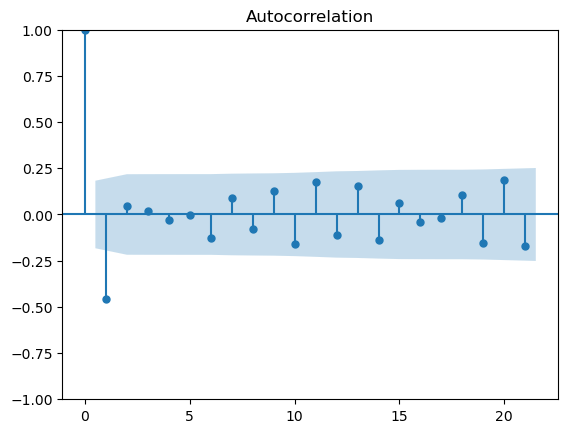

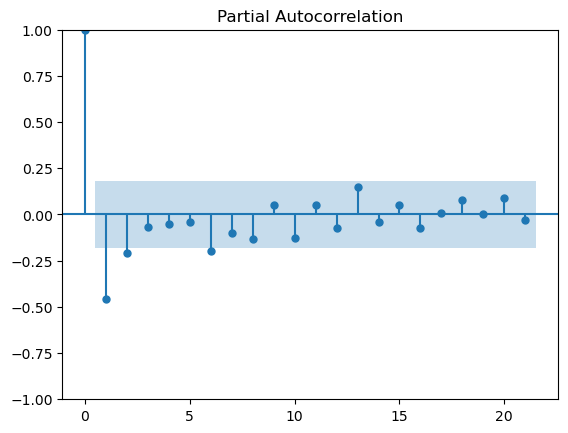

In [377]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

'''1. Autocorrelation Function (ACF) Plot
Purpose: Measures the correlation between a time series and its lagged values.
Interpretation:
No significant spikes outside the confidence interval (blue shaded area).
This suggests that there's little to no autocorrelation in the data. In other words, the value at a given time point is not strongly related to its past values.
2. Partial Autocorrelation Function (PACF) Plot
Purpose: Measures the correlation between a time series and its lagged values, removing the effects of intervening lags.
Interpretation:
Similar to the ACF plot, no significant spikes are observed outside the confidence interval.
This reinforces the conclusion that there's little to no direct relationship between the current value and its lagged values.
Overall Interpretation:

Based on both plots, the time series data appears to be random or white noise. There's no significant pattern or autocorrelation present. This implies that traditional time series forecasting methods might not be suitable for this data.'''

# 4. Autocorrelation and Partial Autocorrelation of Differenced Data
plot_acf(monthly_data_diff)
plt.show()

plot_pacf(monthly_data_diff)
plt.show()

### Lag

What It Is: Lag is the period difference between observations. For example, a lag of 1 means comparing each value with the value immediately preceding it.

Why It's Useful: It helps in understanding the dependencies between current and past values.

How to Plot: Using plot_acf and plot_pacf, we can visualize how the data is related to its past values at different lags.

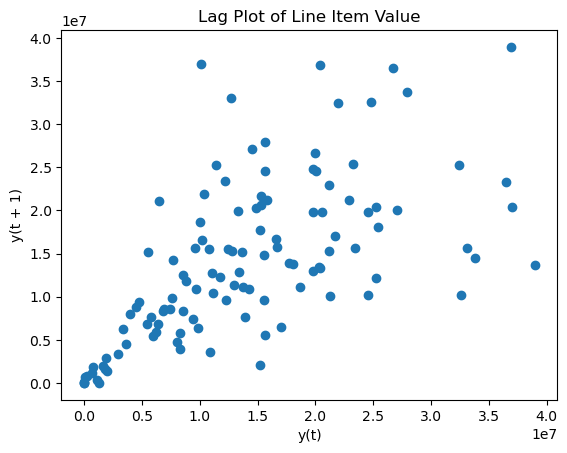

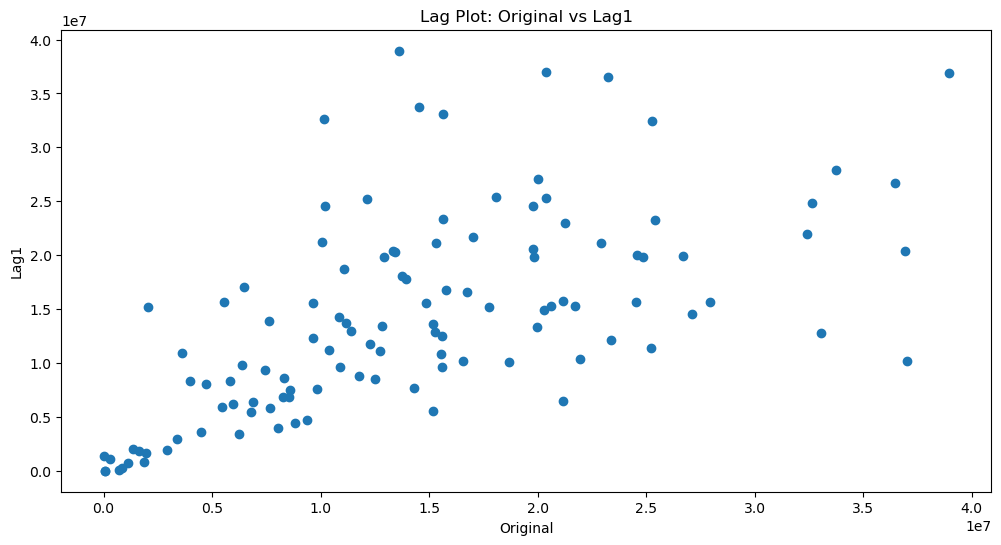

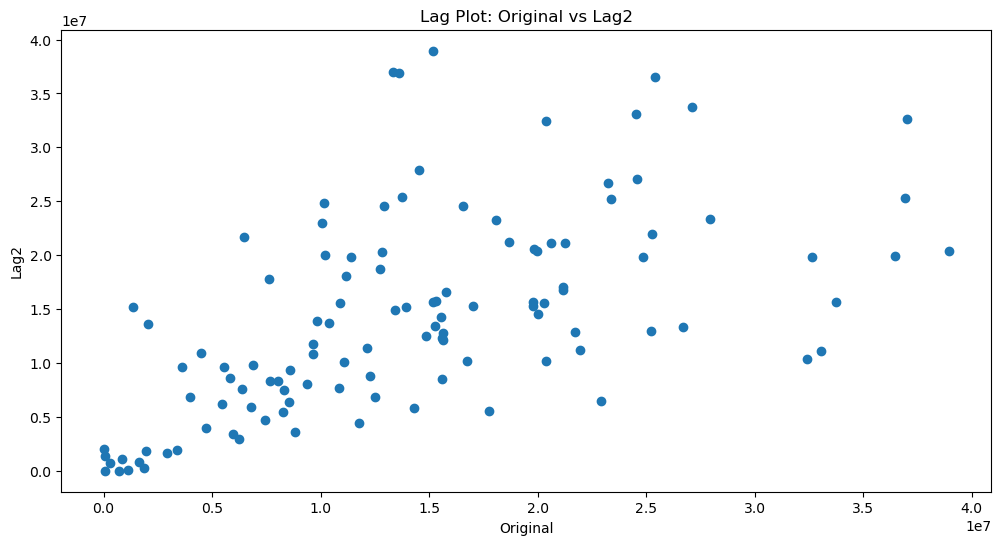

In [379]:
# for more: https://www.geeksforgeeks.org/lag-plots/

'''Insight - Based on these lag plots, it appears that the line item values do not exhibit a significant linear autocorrelation. In other words, the past values of the line items do not strongly predict their future values.'''

# 5. Lag Plot
pd.plotting.lag_plot(monthly_data)
plt.title('Lag Plot of Line Item Value')
plt.show()

# 6. Lagged Data
# Create a DataFrame with lagged values
lagged_data = pd.concat([monthly_data, monthly_data.shift(1), monthly_data.shift(2)], axis=1)
lagged_data.columns = ['Original', 'Lag1', 'Lag2']

# Drop NaN values
lagged_data.dropna(inplace=True)

# Plot Original vs Lag1
plt.figure(figsize=(12, 6))
plt.scatter(lagged_data['Original'], lagged_data['Lag1'])
plt.title('Lag Plot: Original vs Lag1')
plt.xlabel('Original')
plt.ylabel('Lag1')
plt.show()

# Plot Original vs Lag2
plt.figure(figsize=(12, 6))
plt.scatter(lagged_data['Original'], lagged_data['Lag2'])
plt.title('Lag Plot: Original vs Lag2')
plt.xlabel('Original')
plt.ylabel('Lag2')
plt.show()

### Moving Average

What It Is: Moving average is a technique used to smooth out short-term fluctuations and highlight longer-term trends in data.

Why It's Useful: It helps in understanding the underlying trend by reducing noise.

How to Apply: We can apply moving average using the rolling function in Pandas.

Rolling avg

The concept of "rolling" in the context of moving averages is fundamental in time series analysis. It involves calculating the moving average over a specific window of time, which then "rolls" forward through the data set. This helps to smooth out short-term fluctuations and highlight longer-term trends or cycles

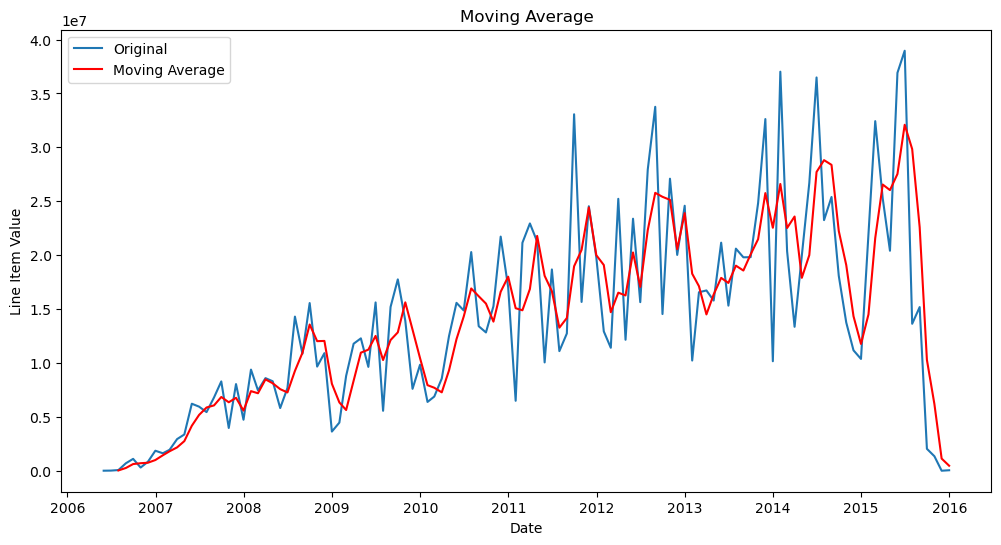

In [381]:
# Moving Average
# Apply a rolling window to calculate the moving average
moving_average = monthly_data.rolling(window=3).mean()

# Plot the original time series and the moving average
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Original')
plt.plot(moving_average, label='Moving Average', color='red')
plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Line Item Value')
plt.legend()
plt.show()

### Smoothing

What It Is: Smoothing involves creating an approximate representation of a time series by removing noise and capturing important patterns.

Why It's Useful: It improves the readability of the time series data and helps in identifying trends and patterns.

How to Apply: We can use techniques like Exponential Moving Average (EMA) for smoothing.

why EMA?
Exponential Moving Average (EMA) gives more weight to recent observations, making it more responsive to new information.

1. Simple Moving Average (SMA)
The Simple Moving Average (SMA) is a basic smoothing technique that calculates the average of data points within a fixed window of time.

How It Works:
Window Size: Choose a window size k. For each point in the series, the SMA is the average of the previous k data points.

2. Exponential Moving Average (EMA)
The Exponential Moving Average (EMA) gives more weight to recent observations, decreasing exponentially with time.

How It Works:
Smoothing Factor: Choose a smoothing factor α (or a window size), which controls the weight decay.


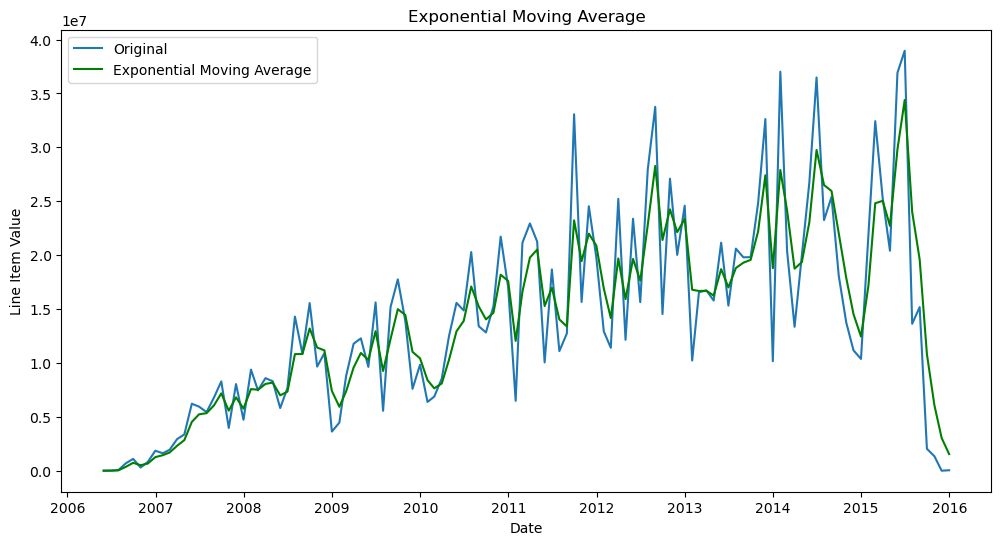

In [383]:
#Exponential Moving Average (Smoothing)
# Apply exponential smoothing
ema = monthly_data.ewm(span=3, adjust=False).mean()

# Plot the original time series and the EMA
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Original')
plt.plot(ema, label='Exponential Moving Average', color='green')
plt.title('Exponential Moving Average')
plt.xlabel('Date')
plt.ylabel('Line Item Value')
plt.legend()
plt.show()

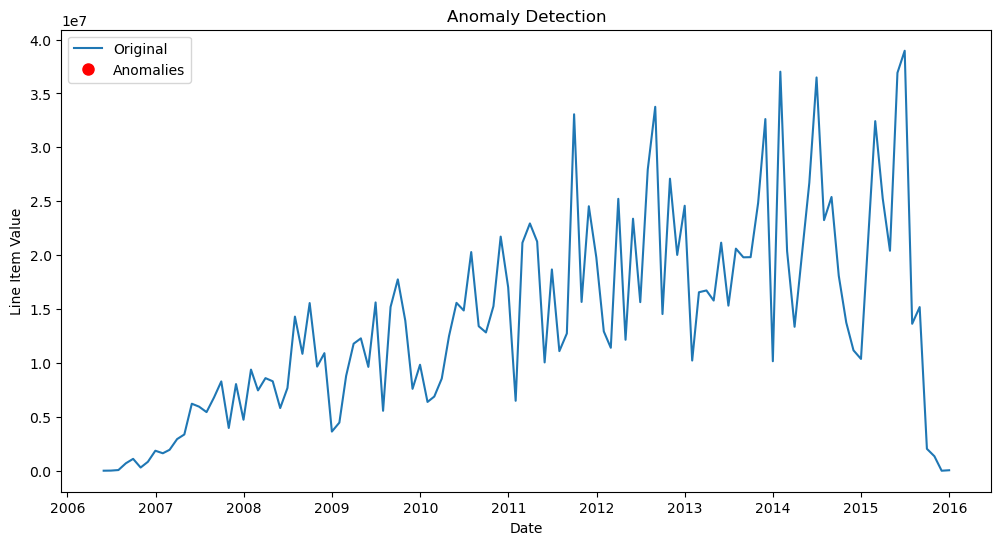

In [384]:
# Anomaly Detection
# Calculate the rolling mean and standard deviation
rolling_mean = monthly_data.rolling(window=3).mean()
rolling_std = monthly_data.rolling(window=3).std()

# Identify anomalies (values more than 2 standard deviations from the mean)
anomalies = monthly_data[(monthly_data - rolling_mean).abs() > 2 * rolling_std]

# Plot the original time series and highlight anomalies
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Original')
plt.plot(anomalies, 'ro', markersize=8, label='Anomalies')
plt.title('Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Line Item Value')
plt.legend()
plt.show()

### Lead Time

What It Is: Lead time in time series refers to the time difference between when an event is observed and when its effect is felt.

Why It's Useful: Understanding lead time helps in planning and making timely decisions.

How to Apply: It can be observed through lag plots and cross-correlation analysis.
### Lag Plot

What It Is: A lag plot is a scatter plot of a time series against a lagged version of itself.

Why It's Useful: It helps in identifying relationships between past and current values, indicating potential autocorrelation.

How to Apply: We can use pd.plotting.lag_plot.


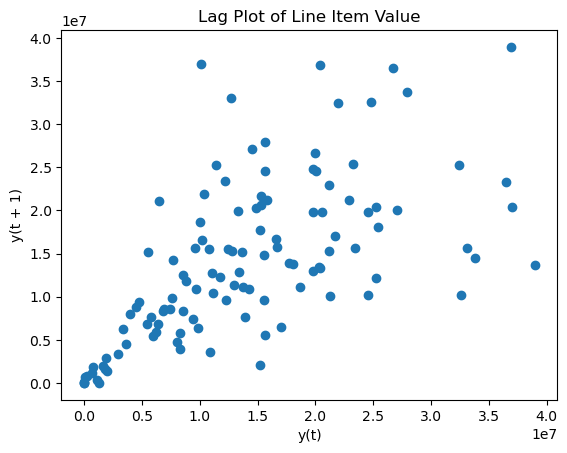

In [386]:
#Lag Plot
pd.plotting.lag_plot(monthly_data)
plt.title('Lag Plot of Line Item Value')
plt.show()

### Autoregression

What It Is: Autoregression is a model that uses the dependent relationship between an observation and a number of lagged observations.

Why It's Useful: It helps in predicting future values based on past values.

How to Apply: We can use the ARIMA model with the autoregressive component.

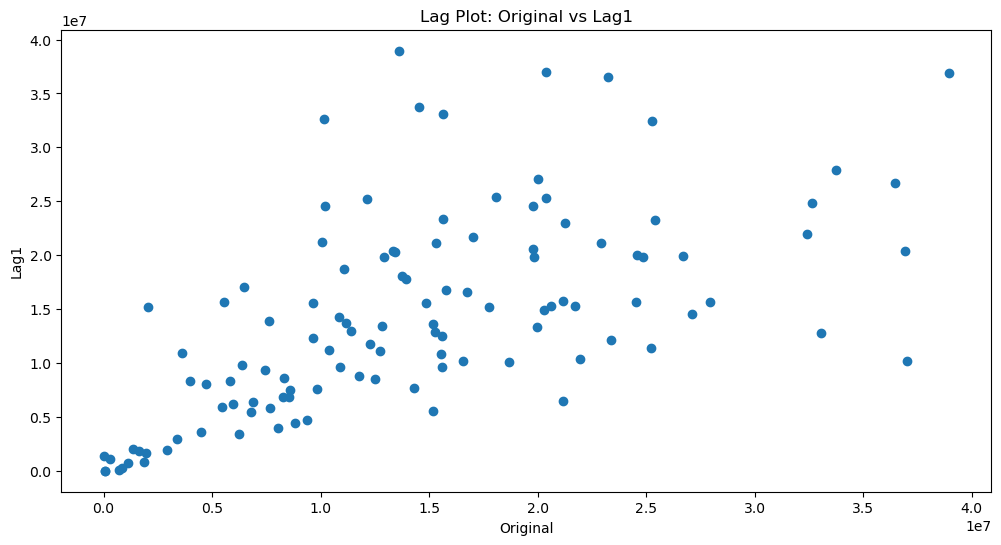

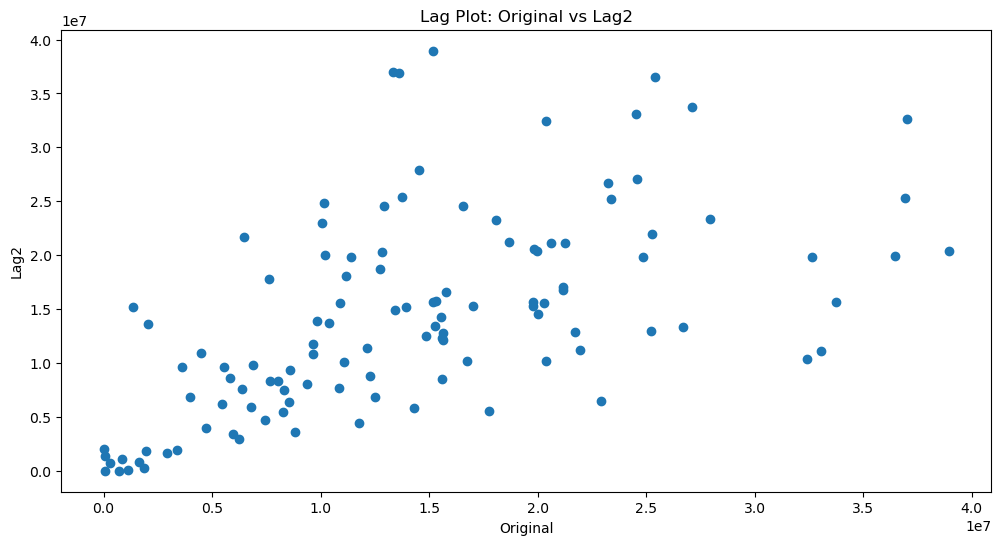

In [388]:
#Autoregression
# Create a lagged DataFrame
lagged_data = pd.concat([monthly_data, monthly_data.shift(1), monthly_data.shift(2)], axis=1)
lagged_data.columns = ['Original', 'Lag1', 'Lag2']

# Drop NaN values
lagged_data.dropna(inplace=True)

# Plot Original vs Lag1
plt.figure(figsize=(12, 6))
plt.scatter(lagged_data['Original'], lagged_data['Lag1'])
plt.title('Lag Plot: Original vs Lag1')
plt.xlabel('Original')
plt.ylabel('Lag1')
plt.show()

# Plot Original vs Lag2
plt.figure(figsize=(12, 6))
plt.scatter(lagged_data['Original'], lagged_data['Lag2'])
plt.title('Lag Plot: Original vs Lag2')
plt.xlabel('Original')
plt.ylabel('Lag2')
plt.show()

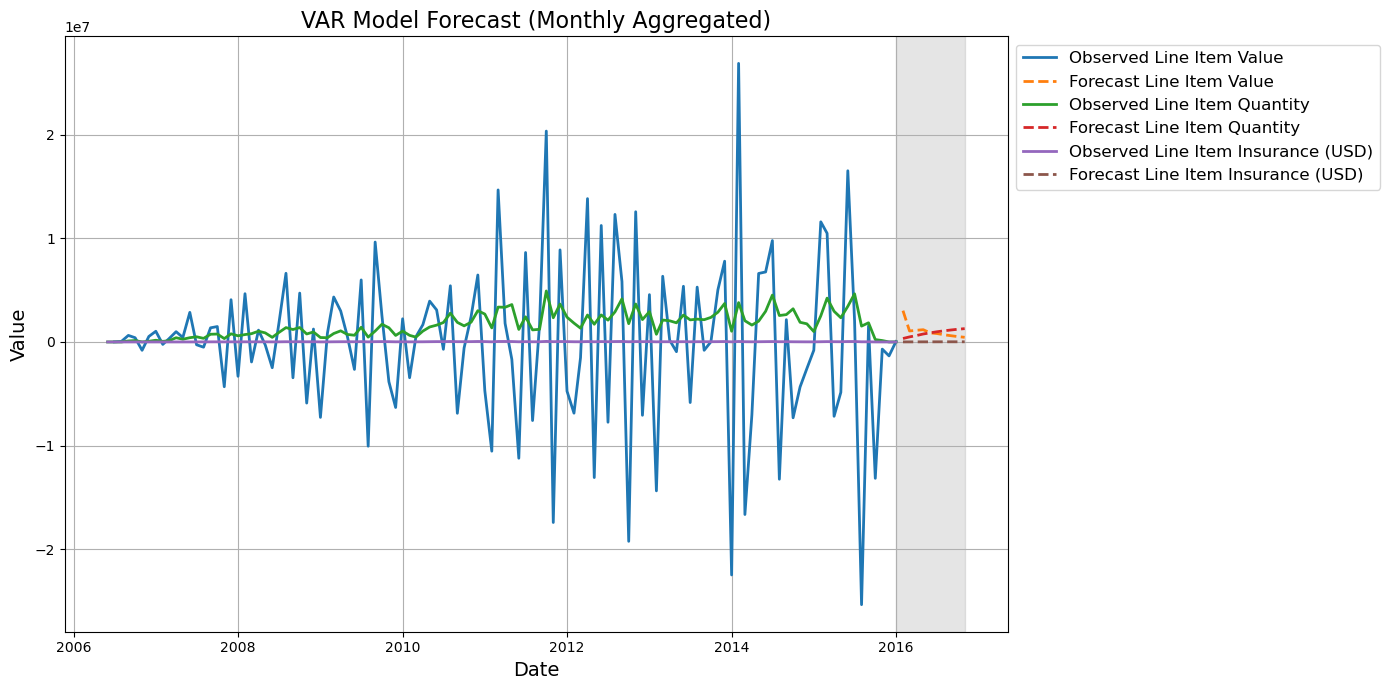

In [432]:
#VAR

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

# Step 1: Data Preparation
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'], errors='coerce')
df_analysis = df[['Scheduled Delivery Date', 'Line Item Value', 'Line Item Quantity' , 'Line Item Insurance (USD)']]
df_analysis.set_index('Scheduled Delivery Date', inplace=True)
df_analysis = df_analysis.fillna(df_analysis.median())

# Step 2: Resampling by Months
df_monthly = df_analysis.resample('M').sum()

# Step 3: Stationarity Check and Differencing
def adf_test(series):
    result = adfuller(series)
    return result[1]

for column in df_monthly.columns:
    p_value = adf_test(df_monthly[column])
    if p_value > 0.05:
        df_monthly[column] = df_monthly[column].diff().dropna()

# Step 4: Lag Order Selection
model = VAR(df_monthly.dropna())
lag_order = model.select_order(maxlags=15).aic

# Step 5: Model Fitting
results = model.fit(lag_order)

# Step 6: Forecasting
forecast_steps = 10
forecast_input = df_monthly.values[-lag_order:]
forecast = results.forecast(y=forecast_input, steps=forecast_steps)
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=df_monthly.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M'), columns=df_monthly.columns)

# Step 7: Visualization
plt.figure(figsize=(14, 7))
for col in df_monthly.columns:
    plt.plot(df_monthly.index, df_monthly[col], label=f'Observed {col}', linewidth=2)
    plt.plot(forecast_df.index, forecast_df[col], label=f'Forecast {col}', linestyle='--', linewidth=2)
plt.axvspan(df_monthly.index[-1], forecast_df.index[-1], color='grey', alpha=0.2)
plt.title('VAR Model Forecast (Monthly Aggregated)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.tight_layout()
plt.show()

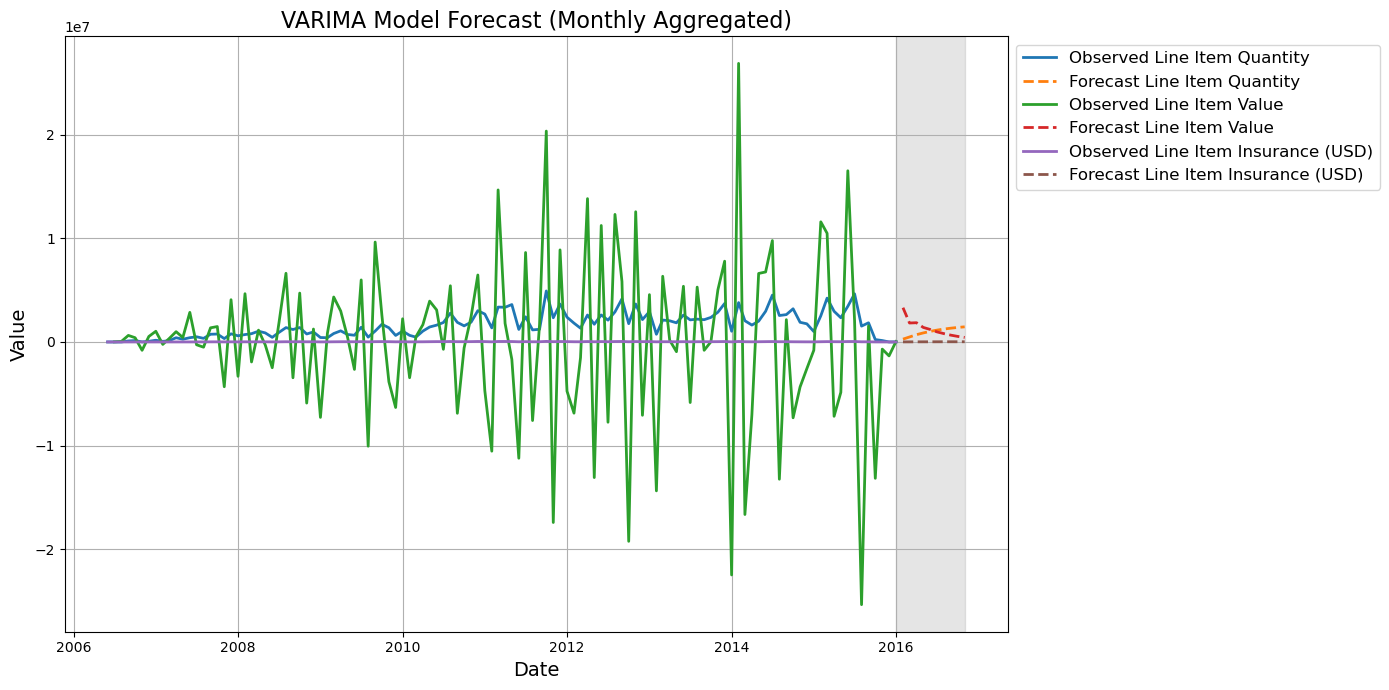

In [444]:
#VARIMA

from statsmodels.tsa.api import VARMAX
from statsmodels.tsa.stattools import adfuller

# Step 1: Data Preparation
#df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'], errors='coerce')
#df_analysis = df[['Scheduled Delivery Date', 'Line Item Quantity', 'Line Item Value' , 'Line Item Insurance (USD)']]
#df_analysis.set_index('Scheduled Delivery Date', inplace=True)
#df_analysis = df_analysis.fillna(df_analysis.median())

# Step 2: Resampling by Months
df_monthly = df_analysis.resample('M').sum()

# Step 3: Stationarity Check and Differencing
def adf_test(series):
    result = adfuller(series)
    return result[1]

for column in df_monthly.columns:
    p_value = adf_test(df_monthly[column])
    if p_value > 0.05:
        df_monthly[column] = df_monthly[column].diff().dropna()

# Step 4: Model Fitting
model = VARMAX(df_monthly.dropna(), order=(1, 1))
results = model.fit(disp=False)

# Step 5: Forecasting
forecast_steps = 10
forecast = results.get_forecast(steps=forecast_steps)
forecast_df = forecast.predicted_mean
forecast_df.index = pd.date_range(start=df_monthly.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

# Step 6: Visualization
plt.figure(figsize=(14, 7))
for col in df_monthly.columns:
    plt.plot(df_monthly.index, df_monthly[col], label=f'Observed {col}', linewidth=2)
    plt.plot(forecast_df.index, forecast_df[col], label=f'Forecast {col}', linestyle='--', linewidth=2)
plt.axvspan(df_monthly.index[-1], forecast_df.index[-1], color='grey', alpha=0.2)
plt.title('VARIMA Model Forecast (Monthly Aggregated)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.tight_layout()
plt.show()

Epoch 1/50
2/2 - 3s - 2s/step - loss: 0.2079 - val_loss: 0.2606
Epoch 2/50
2/2 - 0s - 36ms/step - loss: 0.1850 - val_loss: 0.2328
Epoch 3/50
2/2 - 0s - 38ms/step - loss: 0.1645 - val_loss: 0.2077
Epoch 4/50
2/2 - 0s - 40ms/step - loss: 0.1447 - val_loss: 0.1847
Epoch 5/50
2/2 - 0s - 41ms/step - loss: 0.1268 - val_loss: 0.1632
Epoch 6/50
2/2 - 0s - 37ms/step - loss: 0.1111 - val_loss: 0.1429
Epoch 7/50
2/2 - 0s - 41ms/step - loss: 0.0947 - val_loss: 0.1237
Epoch 8/50
2/2 - 0s - 81ms/step - loss: 0.0790 - val_loss: 0.1056
Epoch 9/50
2/2 - 0s - 34ms/step - loss: 0.0650 - val_loss: 0.0899
Epoch 10/50
2/2 - 0s - 31ms/step - loss: 0.0519 - val_loss: 0.0781
Epoch 11/50
2/2 - 0s - 30ms/step - loss: 0.0404 - val_loss: 0.0721
Epoch 12/50
2/2 - 0s - 34ms/step - loss: 0.0327 - val_loss: 0.0742
Epoch 13/50
2/2 - 0s - 37ms/step - loss: 0.0298 - val_loss: 0.0839
Epoch 14/50
2/2 - 0s - 43ms/step - loss: 0.0313 - val_loss: 0.0933
Epoch 15/50
2/2 - 0s - 43ms/step - loss: 0.0332 - val_loss: 0.0956
Epoch 

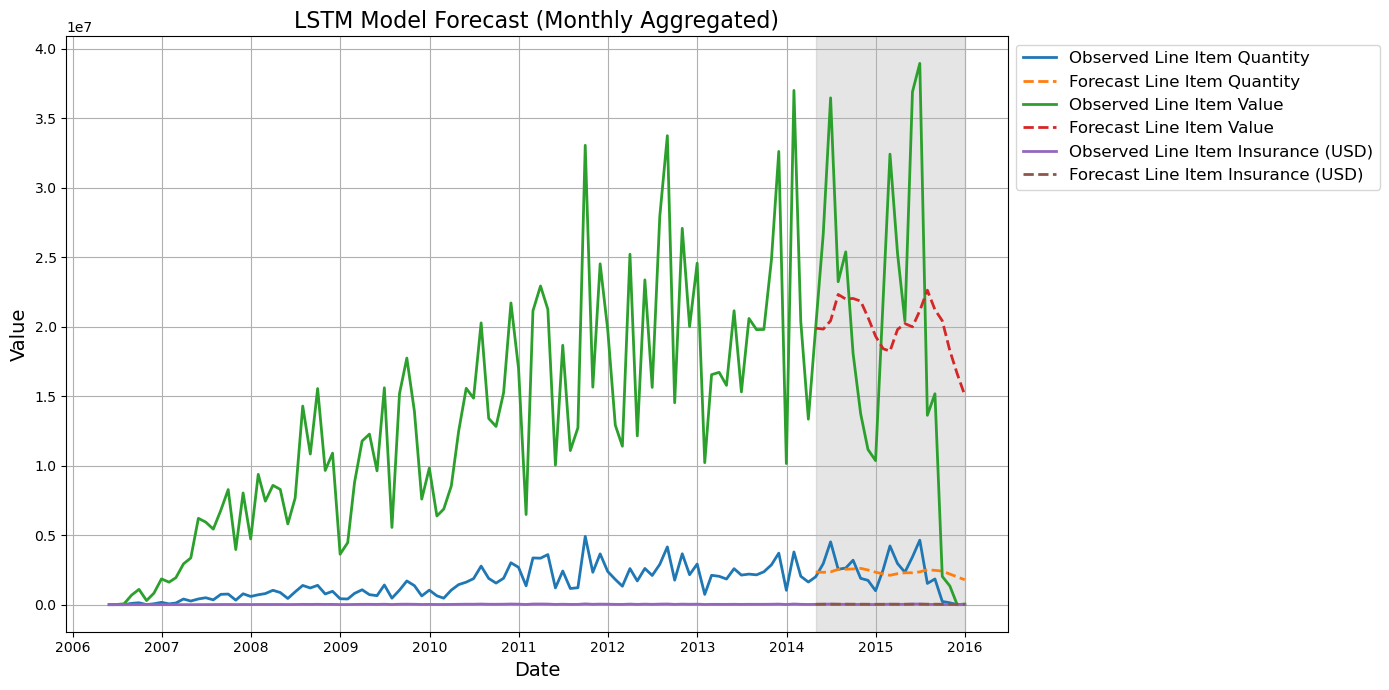

In [442]:
#LSTM

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Step 1: Data Preparation
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'], errors='coerce')
df_analysis = df[['Scheduled Delivery Date', 'Line Item Quantity', 'Line Item Value', 'Line Item Insurance (USD)']]
df_analysis.set_index('Scheduled Delivery Date', inplace=True)
df_analysis = df_analysis.fillna(df_analysis.median())

# Step 2: Resampling by Months
df_monthly = df_analysis.resample('M').sum()

# Step 3: Normalize Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_monthly)

# Step 4: Create Training and Testing Sets
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

look_back = 12  # Number of months to look back
X, y = create_dataset(scaled_data, look_back)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 5: Build and Train LSTM Model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, scaled_data.shape[1])))
model.add(Dense(scaled_data.shape[1]))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2)

# Step 6: Make Forecasts
forecast = model.predict(X_test)
forecast = scaler.inverse_transform(forecast)
y_test_inv = scaler.inverse_transform(y_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, forecast))
print(f'RMSE: {rmse:.2f}')

# Step 7: Visualization
plt.figure(figsize=(14, 7))
for i, col in enumerate(df_monthly.columns):
    plt.plot(df_monthly.index, df_monthly[col], label=f'Observed {col}', linewidth=2)
    plt.plot(df_monthly.index[-len(forecast):], forecast[:, i], label=f'Forecast {col}', linestyle='--', linewidth=2)
plt.axvspan(df_monthly.index[-len(forecast)], df_monthly.index[-1], color='grey', alpha=0.2)
plt.title('LSTM Model Forecast (Monthly Aggregated)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.tight_layout()
plt.show()

### Moving Average (as part of ARIMA)

What It Is: Moving average in ARIMA models accounts for the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Why It's Useful: It helps in smoothing out noise and improving forecast accuracy.

How to Apply: The moving average component is included in the ARIMA model.

### ARIMA (AutoRegressive Integrated Moving Average)

What It Is: ARIMA is a class of models that explains a given time series based on its own past values, its own lagged values (autoregression), and lagged forecast errors (moving average), making it a powerful tool for forecasting.

Why It's Useful: It's widely used for time series forecasting due to its ability to capture different aspects of time series data.

How to Apply: We can fit an ARIMA model using the statsmodels library.

In [449]:
#Step 1 read the data

df = pd.read_csv("sales.xls",parse_dates=['Date'],index_col=['Date'])
df

,Sales
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


#### Step 2: Resample
 Aggregation of the data , 
 Daily--> monthly
#### points to remember:
1. "A"--->Year End
2. "M"--->Month End
3. "W"--->Weekly
4. "D"--->Daily
5. "MS"-->Month Start

In [452]:
ts = df['Sales'].resample('MS').sum()

In [454]:
ts.head()

Date
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Freq: MS, Name: Sales, dtype: int64

<Axes: xlabel='Date'>

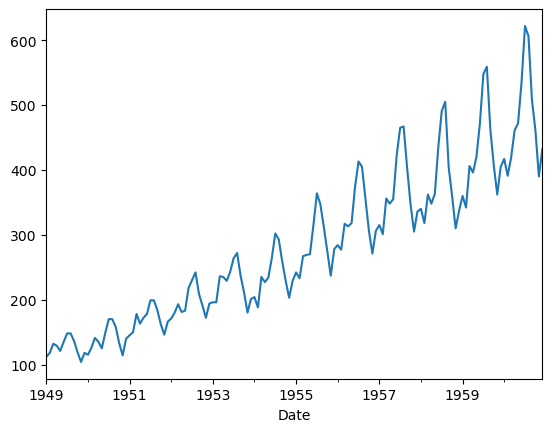

In [456]:
ts.plot()

#### Step 3: Stationarity check 

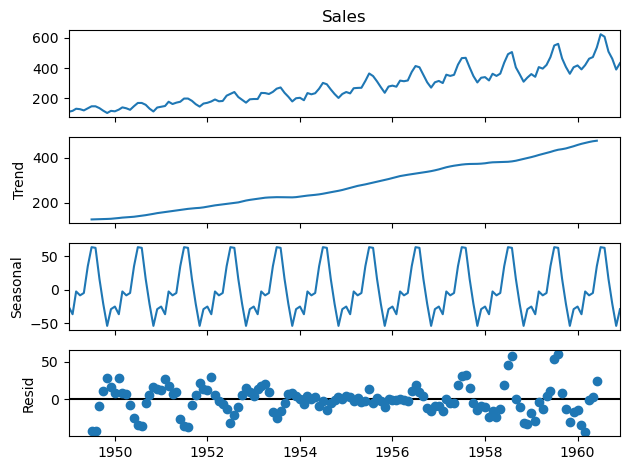

In [459]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(ts,model = "additive")
fig = decomposition.plot()
plt.show()

In [460]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(ts)
print('pvalue of adfuller test is:',adftest[1])

pvalue of adfuller test is: 0.9918802434376411


#### Step 4 : Train test split

In [462]:
len(ts)

144

In [463]:
train = ts[:64]
test = ts[64:]

#### ARIMA model

1. ARIMA
2. Non Seasonal Time Series
3. Seasonal ARIMA
4. Seasonal TIme Series

#### 1.  AR (Autoregressive)-Regresion with past values.
##### yt = a +b1Yt-1 +b2Yt-2+b3Yt-3 +Error

SalesDEC = a+b1SalesNOV + b2SalesOCT + b3SalesSEP + Error1

P = Order of AR, P=3 that means yt is dependent on past 3 periods          
p is find by using PACF plot           
PACF plot shows the correlation of series with its lagged values              

#### 3. Integrated-Differencing :
WE difference the data to remove trend and sesonality to make it stationary.
#### d = order of integrated (How many time we difference the data)

#### ARIMA -
1. AR =p
2. MA =q
3. Integrated = d

#### step 5: Hyperparameters of ARIMA p,q,d

In [474]:
# p=5,d=0,q=4

#### Step 6: Build ARIMA model 

In [477]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train,order=(5,0,4)).fit

#### Step 7 : Predict test dataset

In [480]:
len(train),(len(ts)-10)

(64, 134)

In [482]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(0, 1, 1))
model_fit = model.fit()
pred = model_fit.predict(start=len(train), end=len(ts)-1)

In [484]:
pred.head()

1954-05-01    224.894808
1954-06-01    224.894808
1954-07-01    224.894808
1954-08-01    224.894808
1954-09-01    224.894808
Freq: MS, Name: predicted_mean, dtype: float64

In [486]:
train.head()

Date
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Freq: MS, Name: Sales, dtype: int64

#### Step 8 Model Evaluation :

In [489]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(test,pred))
error

166.78585255391698

In [491]:
test.mean(),np.sqrt(test.var())

(365.0875, 90.92230564914729)

<Axes: xlabel='Date'>

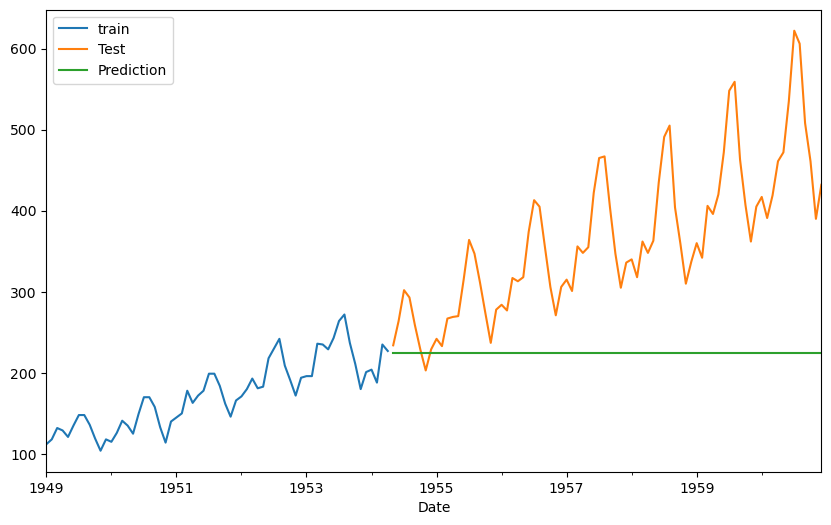

In [493]:
train.plot(legend=True,label="train",figsize=(10,6))
test.plot(legend = True,label='Test')
pred.plot(legend = True,label="Prediction")

#### Step 9 : Predict the Future Data

In [496]:
final_model = ARIMA(ts,order=(0,5,4)).fit()

In [497]:
prediction = final_model.predict(len(ts),len(ts)+16)

<Axes: xlabel='Date'>

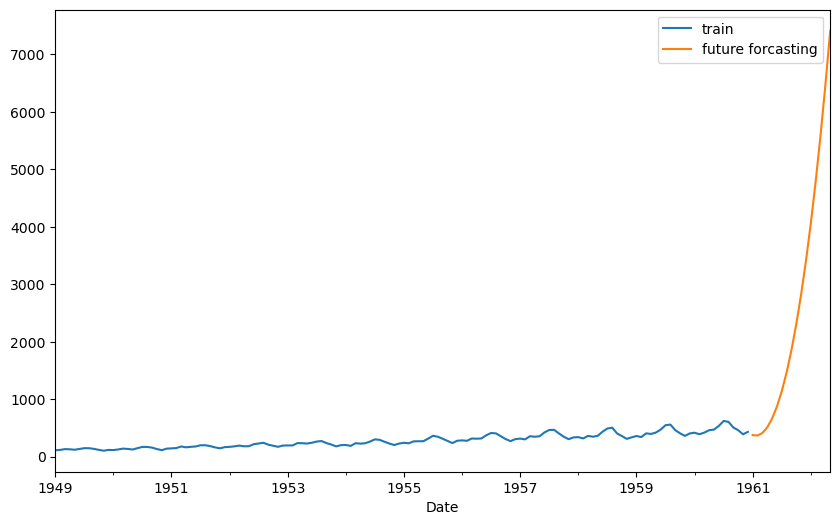

In [498]:
ts.plot(legend=True,label="train",figsize=(10,6))
prediction.plot(legend=True,label='future forcasting')

### SARIMA

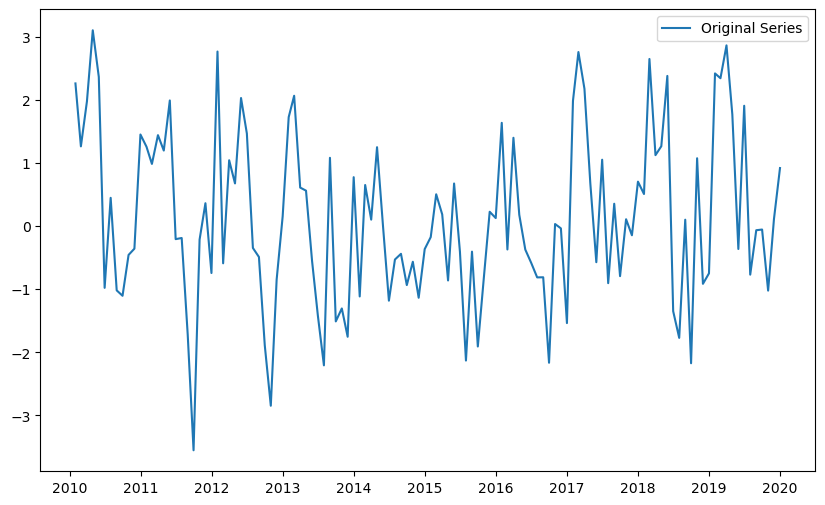

ADF Statistic: -1.0194135292097897
p-value: 0.7461179752655227


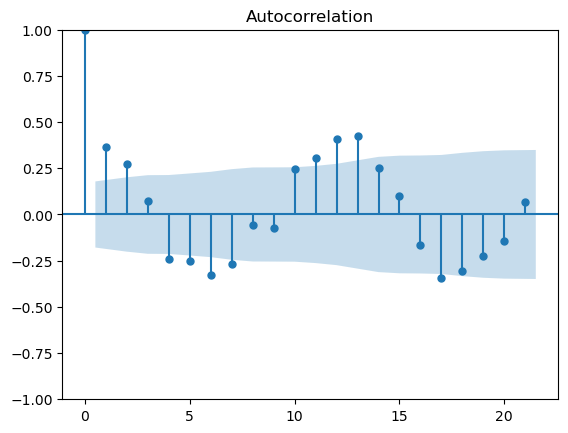

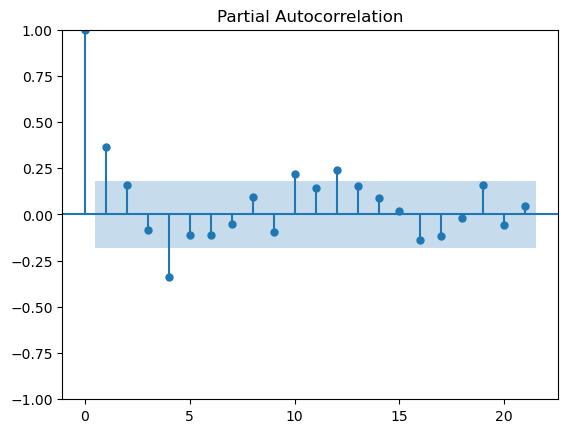

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=407.747, Time=0.11 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=458.464, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=393.051, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=339.780, Time=0.12 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=379.150, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=341.457, Time=0.21 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=341.400, Time=0.32 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=355.142, Time=0.10 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=341.051, Time=0.16 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=341.002, Time=0.17 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=375.466, Time=0.10 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=338.094, Time=0.56 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AI

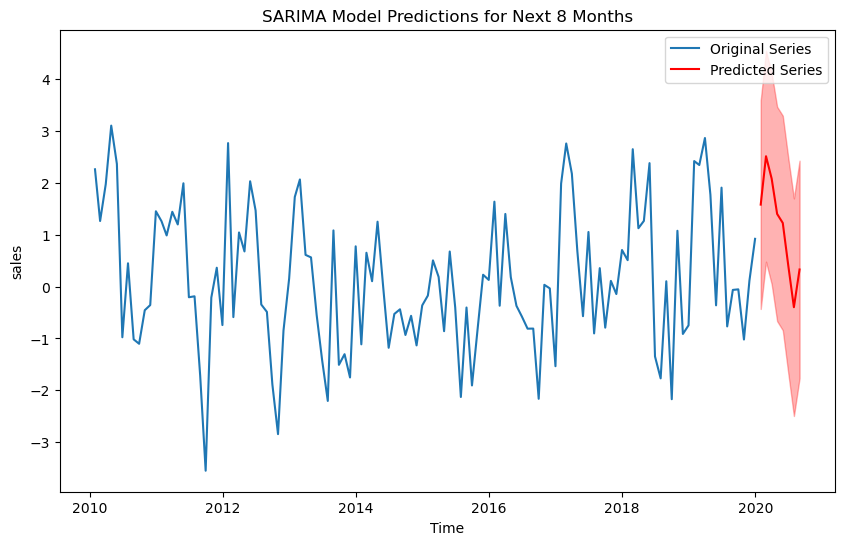

In [502]:
import warnings
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Ignore warnings
warnings.filterwarnings('ignore')

# Sample Data Preparation (if needed)
np.random.seed(0)
n_periods = 120  # 10 years of monthly data
date_range = pd.date_range(start='2010-01-01', periods=n_periods, freq='M')
data = np.sin(2 * np.pi * date_range.month / 12) + np.random.normal(size=n_periods)

# Convert to a pandas Series
ts = pd.Series(data, index=date_range)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Original Series')
plt.legend()
plt.show()

# Check for stationarity
result = adfuller(ts)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Plot ACF and PACF
plot_acf(ts)
plot_pacf(ts)
plt.show()

# Fit the auto_arima model with seasonal component
model = pm.auto_arima(ts,
                      m=12,  # Seasonal periodicity (e.g., 12 for monthly data with yearly seasonality)
                      start_p=0,
                      start_q=0,
                      max_p=3,
                      max_q=3,
                      seasonal=True,
                      d=1,
                      D=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

# Summary of the model
print(model.summary())

# Make predictions for the next 8 months
n_periods = 8
pred, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Create a date range for the prediction period
future_dates = pd.date_range(start=ts.index[-1], periods=n_periods + 1, freq='M')[1:]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Original Series')
plt.plot(future_dates, pred, label='Predicted Series', color='red')
plt.fill_between(future_dates, 
                 conf_int[:, 0], 
                 conf_int[:, 1], 
                 color='red', 
                 alpha=0.3)
plt.xlabel('Time')
plt.ylabel('sales')
plt.title('SARIMA Model Predictions for Next 8 Months')
plt.legend()
plt.show()